# IEEE Fraud Detection Kaggle Competition
## Exploratory Data Analysis

The objective of this notebook is to get an initial sense of the ID metadata and investigate the following properties:
     - Can we recognise some anonymised features?
     - Do any features seem to have a strong association with the target?
     - Missing data
     - Differences between train and test

In [60]:
%%bash

ls -l

cd data 

ls -l

total 9136
-rw-r--r--  1 cchadha2  749149485  1976809 Jul 25 23:44 EDA.ipynb
-rw-r--r--  1 cchadha2  749149485  1265261 Jul 29 22:36 IDs-EDA.ipynb
-rw-r--r--  1 cchadha2  749149485      162 Jul 16 17:57 README.md
drwxr-xr-x  8 cchadha2  749149485      256 Jul 17 10:14 data
-rw-r--r--@ 1 cchadha2  749149485    12588 Jul 25 22:31 id_32_nans.png
-rw-r--r--  1 cchadha2  749149485  1412085 Jul 29 22:36 log_reg.ipynb
total 220088
-rw-r--r--  1 cchadha2  749149485   1193102 Jul 16 17:16 sample_submission.csv.zip
-rw-r--r--  1 cchadha2  749149485   3114671 Jul 16 17:16 test_identity.csv.zip
-rw-r--r--  1 cchadha2  749149485  49628952 Jul 16 17:16 test_transaction.csv.zip
-rw-r--r--  1 cchadha2  749149485   3166121 Jul 16 17:16 train_identity.csv.zip
-rw-r--r--  1 cchadha2  749149485  55058732 Jul 16 17:16 train_transaction.csv.zip


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
SEED = 5000

In [62]:
train_ids = pd.read_csv('data/train_identity.csv.zip')
test_ids = pd.read_csv('data/test_identity.csv.zip')
train_trans = pd.read_csv('data/train_transaction.csv.zip')
test_trans = pd.read_csv('data/test_transaction.csv.zip')

In [63]:
train_ids.head(20)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.00,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.00,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.00,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.00,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,0.0,100.00,NotFound,52.0,-300.0,Found,Found,166.0,18.0,529.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,0.0,100.00,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.00,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.00,NotFound,52.0,NaN,New,NotFound,225.0,NaN,484.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


id_12 onwards are noted to be categorical features. Let's look at these first.

In [64]:
target_df = pd.merge(train_trans, train_ids, on='TransactionID', how='outer')

In [65]:
target_df.shape

(590540, 434)

In [66]:
train_trans.shape

(590540, 394)

In [67]:
train_ids.shape[0]*100/train_trans.shape[0]

24.42391709283029

Only about 25% of transactions have ID metadata associated with them in the training set. Let's see the ratio for test

In [68]:
test_target_df = pd.merge(test_ids, test_trans, on='TransactionID', how='outer')

In [69]:
test_ids.shape[0]*100/test_trans.shape[0]

28.006615471756948

In [70]:
test_target_df.shape

(506691, 433)

A little bit more available for test. It could be interesting to figure out why so many transactions do not have device metadata associated with them

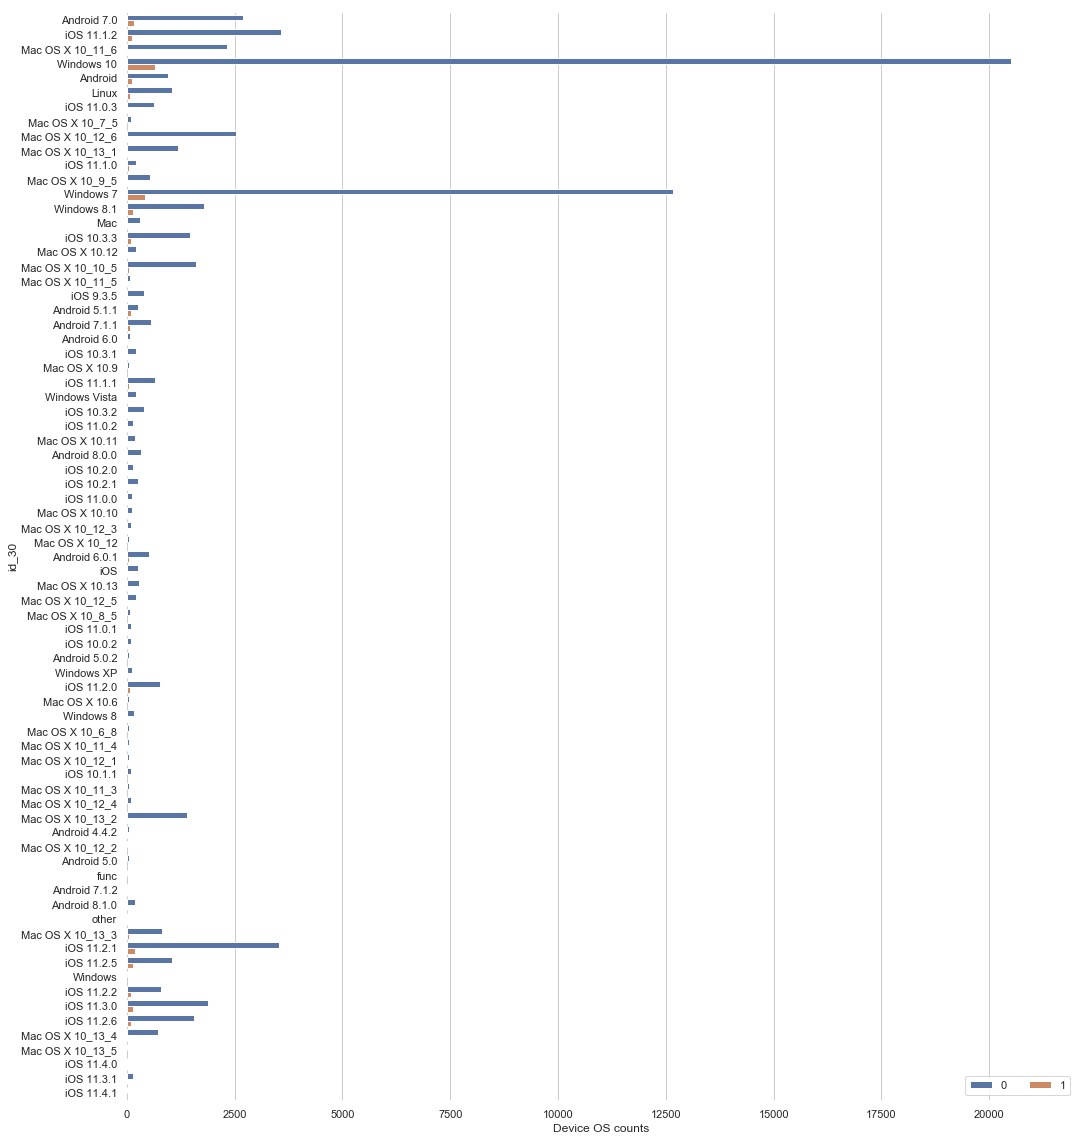

In [71]:
fig = plt.figure(figsize=(17,20))

sns.set(style="whitegrid")

ax = sns.countplot(y='id_30', hue='isFraud', data=target_df)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,22000), xlabel="Device OS counts", label=True)
sns.despine(left=True, bottom=True)

Looks like a few of the iOS.11 devices might be a decent bet for fraud. Let's explore this further

In [72]:
useful_device_os = ['Android 7.0', 'iOS 11.1.2', 'Windows 10', 'Android', 'Linux', 'Windows 7',
                    'Windows 8.1', 'iOS 10.3.3', 'Android 5.1.1', 'Android 7.1.1', 'iOS 11.2.1',
                    'iOS 11.2.5', 'iOS 11.2.2', 'iOS 11.3.0', 'iOS 11.2.6']

[Text(0, 0.5, 'Normalized count'),
 Text(0.5, 0, 'isFraud'),
 Text(0.5, 1.0, 'MISSING')]

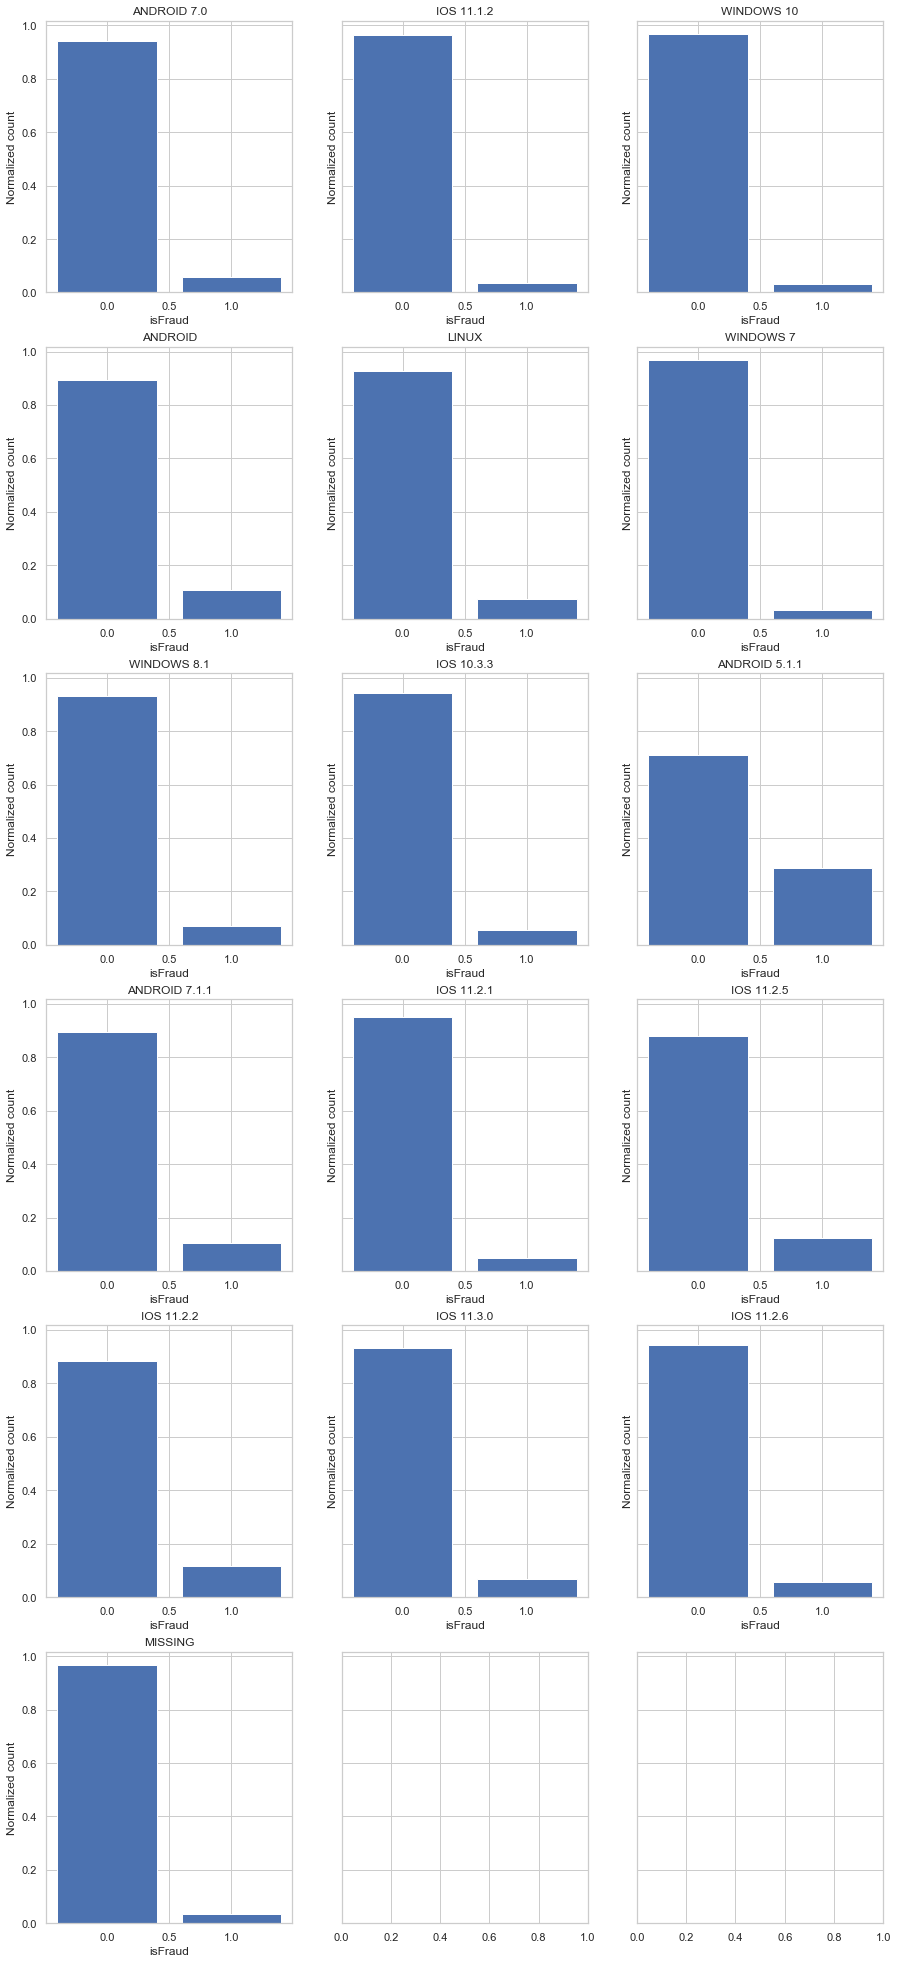

In [73]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize = (15,35), sharey=True)

axes = axes.flatten()

for plot, os in enumerate(useful_device_os):
    axes[plot].bar(target_df[target_df['id_30'] == os]['isFraud'].value_counts().index,
                target_df[target_df['id_30'] == os]['isFraud'].value_counts().values/\
                target_df[target_df['id_30'] == os]['isFraud'].value_counts().sum())
    axes[plot].set(title=str(os).upper(),
                ylabel = 'Normalized count',
                xlabel = 'isFraud')
    
axes[15].bar(target_df[target_df['id_30'].isna()]['isFraud'].value_counts().index,
            target_df[target_df['id_30'].isna()]['isFraud'].value_counts().values/\
            target_df[target_df['id_30'].isna()]['isFraud'].value_counts().sum())

axes[15].set(title='Missing'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

In [74]:
(target_df['id_30'] == 'Android 5.1.1').value_counts()

False    590190
True        350
Name: id_30, dtype: int64

In [75]:
(test_target_df['id_30'] == 'Android 5.1.1').value_counts()

False    506364
True        327
Name: id_30, dtype: int64

Android 5.1.1 looks to be highly useful even though there are aren't many devices labelled as such overall. Could also be worthwhile grouping all of the iOS 11 features together as it seems to be a decent predictor for fraud. Is this just captured in the DeviceInfo feature though?

<BarContainer object of 2 artists>

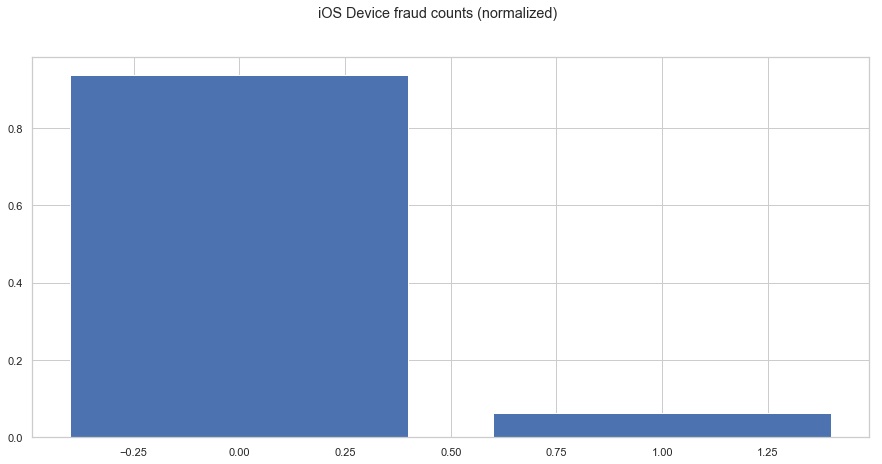

In [76]:
fig=plt.figure(figsize = (15,7))

fig.suptitle(t='iOS Device fraud counts (normalized)')

plt.bar(target_df[target_df['DeviceInfo'] == 'iOS Device']['isFraud'].value_counts().index,
       target_df[target_df['DeviceInfo'] == 'iOS Device']['isFraud'].value_counts().values/\
       target_df[target_df['DeviceInfo'] == 'iOS Device']['isFraud'].value_counts().sum())

<BarContainer object of 2 artists>

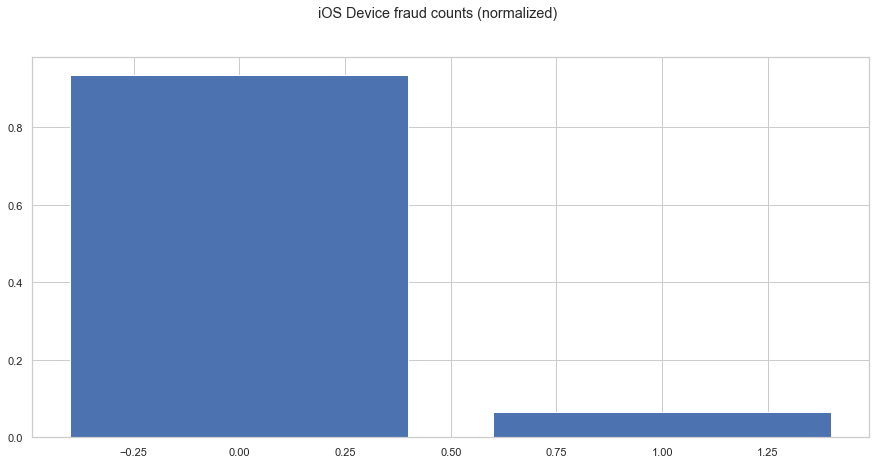

In [77]:
ios11_devices = [os for os in target_df['id_30'].value_counts().index.tolist() if os.startswith('iOS 11')]

fig=plt.figure(figsize = (15,7))

fig.suptitle(t='iOS Device fraud counts (normalized)')

plt.bar(target_df[target_df['id_30'].isin(ios11_devices)]['isFraud'].value_counts().index,
        target_df[target_df['id_30'].isin(ios11_devices)]['isFraud'].value_counts().values/\
        target_df[target_df['id_30'].isin(ios11_devices)]['isFraud'].value_counts().sum())

Nope, looks exactly the same as the 'iOS Device' value in DeviceInfo

 Let's do similar plots for a few of the other categorical variables

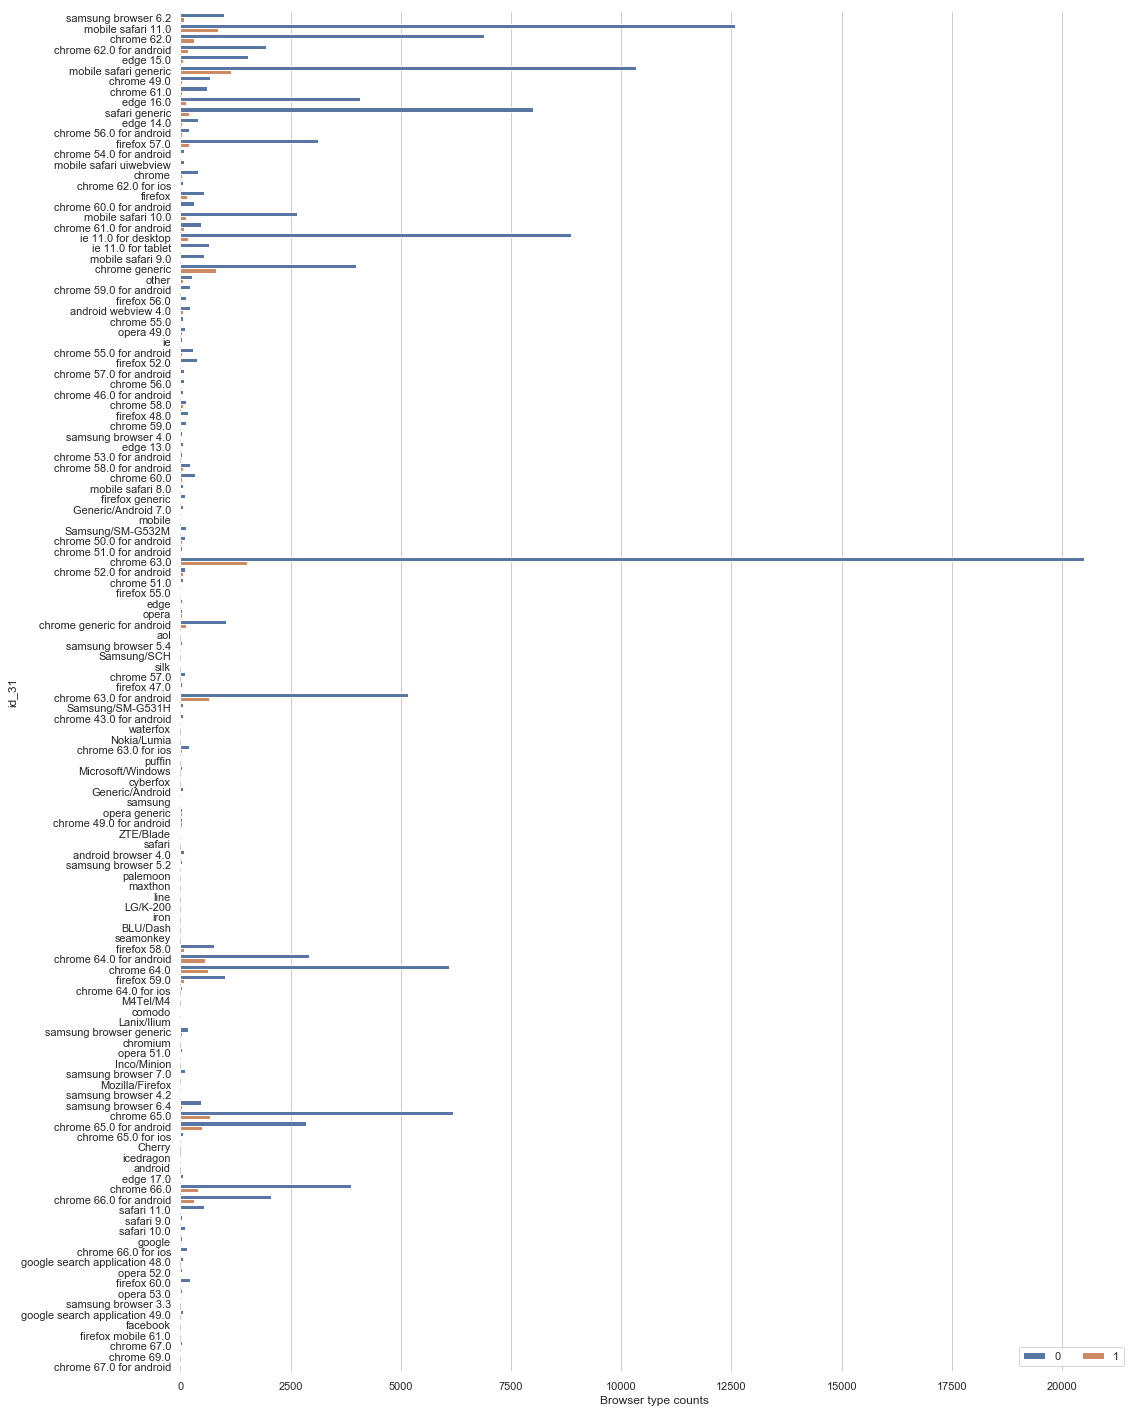

In [78]:
fig = plt.figure(figsize=(17,25))

sns.set(style="whitegrid")

ax = sns.countplot(y='id_31', hue='isFraud', data=target_df)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Browser type counts", label=True)
sns.despine(left=True, bottom=True)

In [79]:
useful_browsers = ['mobile safari 11.0', 'chrome 62.0', 'chrome 62.0 for android', 'mobile safari generic',
                  'safari generic', 'chrome generic', 'chrome 61.0 for android', 'firefox', 'samsung browser 6.2',
                  'chrome 63.0', 'chrome generic for android', 'chrome 63.0 for android',
                  'firefox 58.0', 'chrome 64.0 for android', 'chrome 64.0', 'chrome 65.0',
                  'chrome 65.0 for android', 'chrome 66.0', 'chrome 66.0 for android']

[Text(0, 0.5, 'Normalized count'), Text(0.5, 1.0, 'MISSING')]

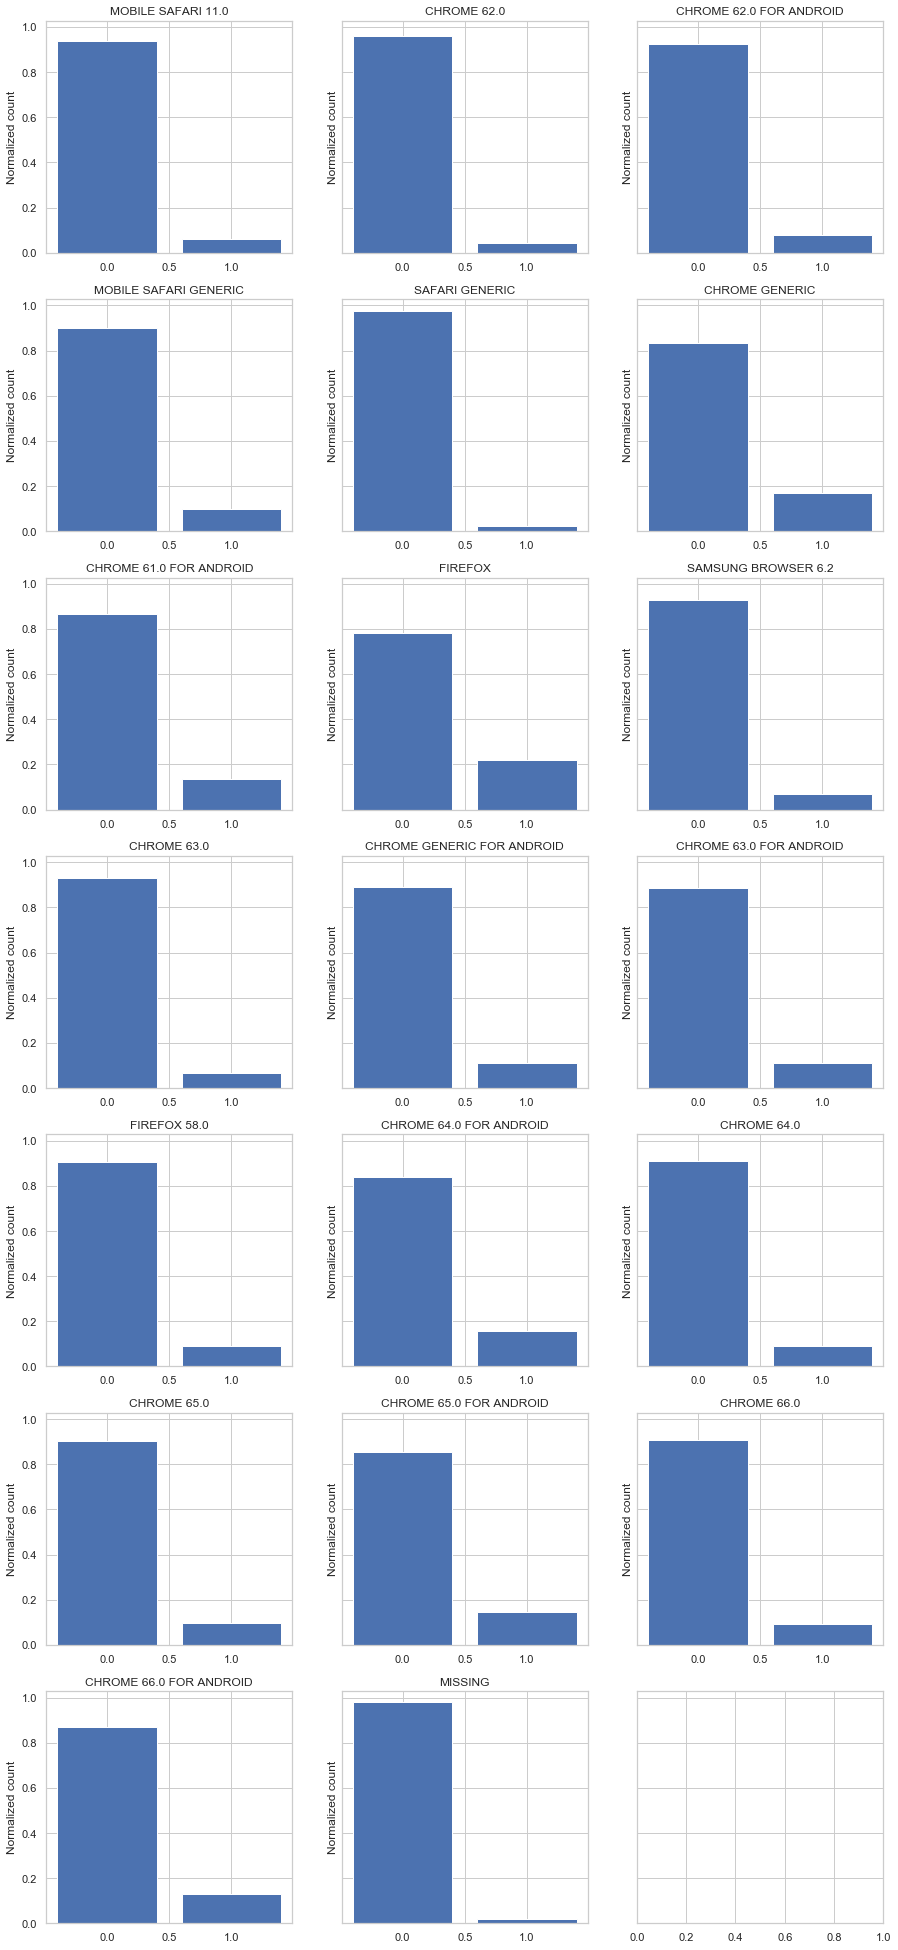

In [80]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize = (15,35), sharey=True)

axes = axes.flatten()

for plot, browser in enumerate(useful_browsers):
    axes[plot].bar(target_df[target_df['id_31'] == browser]['isFraud'].value_counts().index,
                target_df[target_df['id_31'] == browser]['isFraud'].value_counts().values/\
                target_df[target_df['id_31'] == browser]['isFraud'].value_counts().sum())
    axes[plot].set(title=str(browser).upper(),
                ylabel = 'Normalized count')
    
axes[19].bar(target_df[target_df['id_31'].isna()]['isFraud'].value_counts().index,
            target_df[target_df['id_31'].isna()]['isFraud'].value_counts().values/\
            target_df[target_df['id_31'].isna()]['isFraud'].value_counts().sum())

axes[19].set(title='Missing'.upper(),
            ylabel = 'Normalized count')

About 20% of Firefox and Chrome generic users used the browsers to commit fraudulent transactions. Interesting.

Seems to be a lot of fraud from mobile devices - let's see a breakdown of device type

In [81]:
target_df['DeviceType'].fillna('Missing', inplace=True)

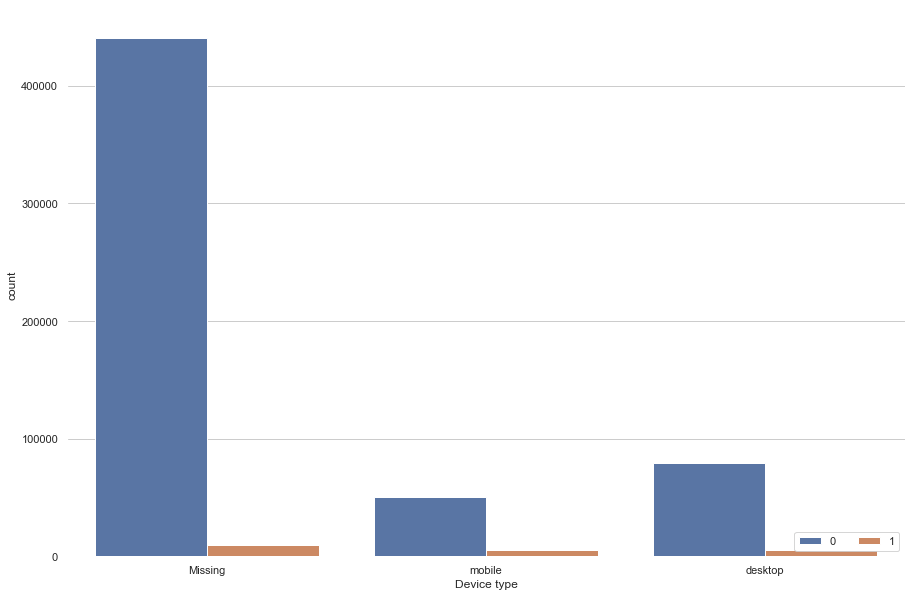

In [82]:
fig = plt.figure(figsize=(15,10))

sns.set(style="whitegrid")

ax = sns.countplot(x='DeviceType', hue='isFraud', data=target_df)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Device type", label=True)
sns.despine(left=True, bottom=True)

Definitely looks like more fraudulent transactions from mobile devices. Let's normalise this plot

[Text(0, 0.5, 'Normalized count'),
 Text(0.5, 0, 'isFraud'),
 Text(0.5, 1.0, 'DESKTOP')]

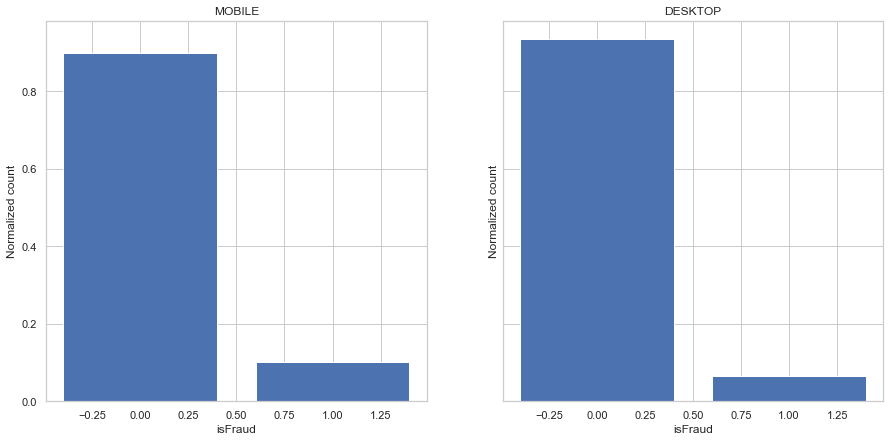

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,7), sharey=True)

axes = axes.flatten()

axes[0].bar(target_df[target_df['DeviceType'] == 'mobile']['isFraud'].value_counts().index,
            target_df[target_df['DeviceType'] == 'mobile']['isFraud'].value_counts().values/\
            target_df[target_df['DeviceType'] == 'mobile']['isFraud'].value_counts().sum())
axes[0].set(title='Mobile'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

axes[1].bar(target_df[target_df['DeviceType'] == 'desktop']['isFraud'].value_counts().index,
            target_df[target_df['DeviceType'] == 'desktop']['isFraud'].value_counts().values/\
            target_df[target_df['DeviceType'] == 'desktop']['isFraud'].value_counts().sum())
axes[1].set(title='Desktop'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

Yep definitely more likely to be mobile

In [84]:
train_ids.head(30)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.000000,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.000000,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.000000,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.000000,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,0.0,100.000000,NotFound,52.0,-300.0,Found,Found,166.0,18.0,529.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,0.0,100.000000,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.000000,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.000000,NotFound,52.0,NaN,New,NotFound,225.0,NaN,484.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [85]:
target_df['id_32'].fillna('Missing', inplace=True)

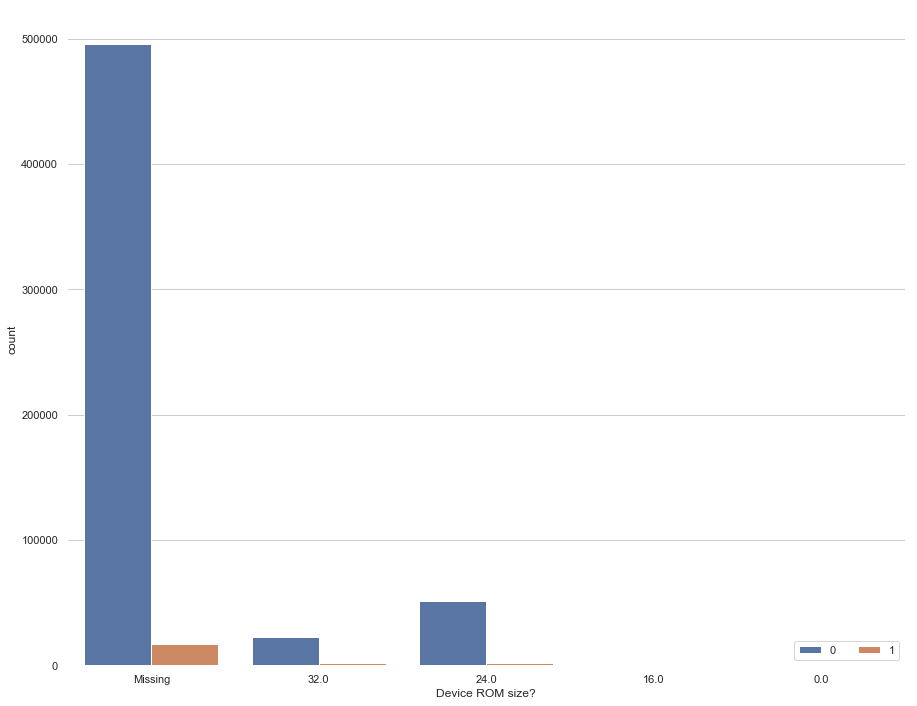

In [86]:
fig = plt.figure(figsize=(15,12))

sns.set(style="whitegrid")

ax = sns.countplot(x='id_32', hue='isFraud', data=target_df)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Device ROM size?", label=True)
sns.despine(left=True, bottom=True)

Normalised:

[Text(0, 0.5, 'Normalized count'),
 Text(0.5, 0, 'isFraud'),
 Text(0.5, 1.0, 'MISSING')]

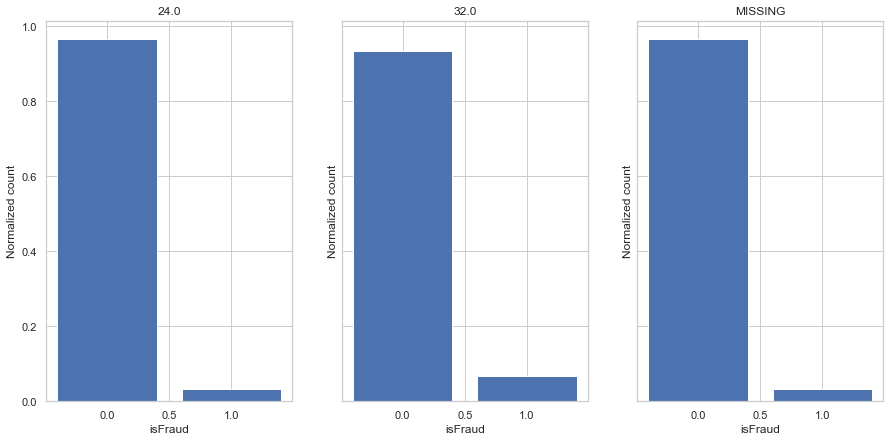

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,7), sharey=True)

axes = axes.flatten()

axes[0].bar(target_df[target_df['id_32'] == 24.0]['isFraud'].value_counts().index,
            target_df[target_df['id_32'] == 24.0]['isFraud'].value_counts().values/\
            target_df[target_df['id_32'] == 24.0]['isFraud'].value_counts().sum())
axes[0].set(title='24.0'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

axes[1].bar(target_df[target_df['id_32'] == 32.0]['isFraud'].value_counts().index,
            target_df[target_df['id_32'] == 32.0]['isFraud'].value_counts().values/\
            target_df[target_df['id_32'] == 32.0]['isFraud'].value_counts().sum())
axes[1].set(title='32.0'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

axes[2].bar(target_df[target_df['id_32'] == 'Missing']['isFraud'].value_counts().index,
            target_df[target_df['id_32'] == 'Missing']['isFraud'].value_counts().values/\
            target_df[target_df['id_32'] == 'Missing']['isFraud'].value_counts().sum())
axes[2].set(title='Missing'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

Looks like a decent association between this feature being missing and a fraudulent transaction

In [88]:
target_df['id_33'].fillna('Missing', inplace=True)

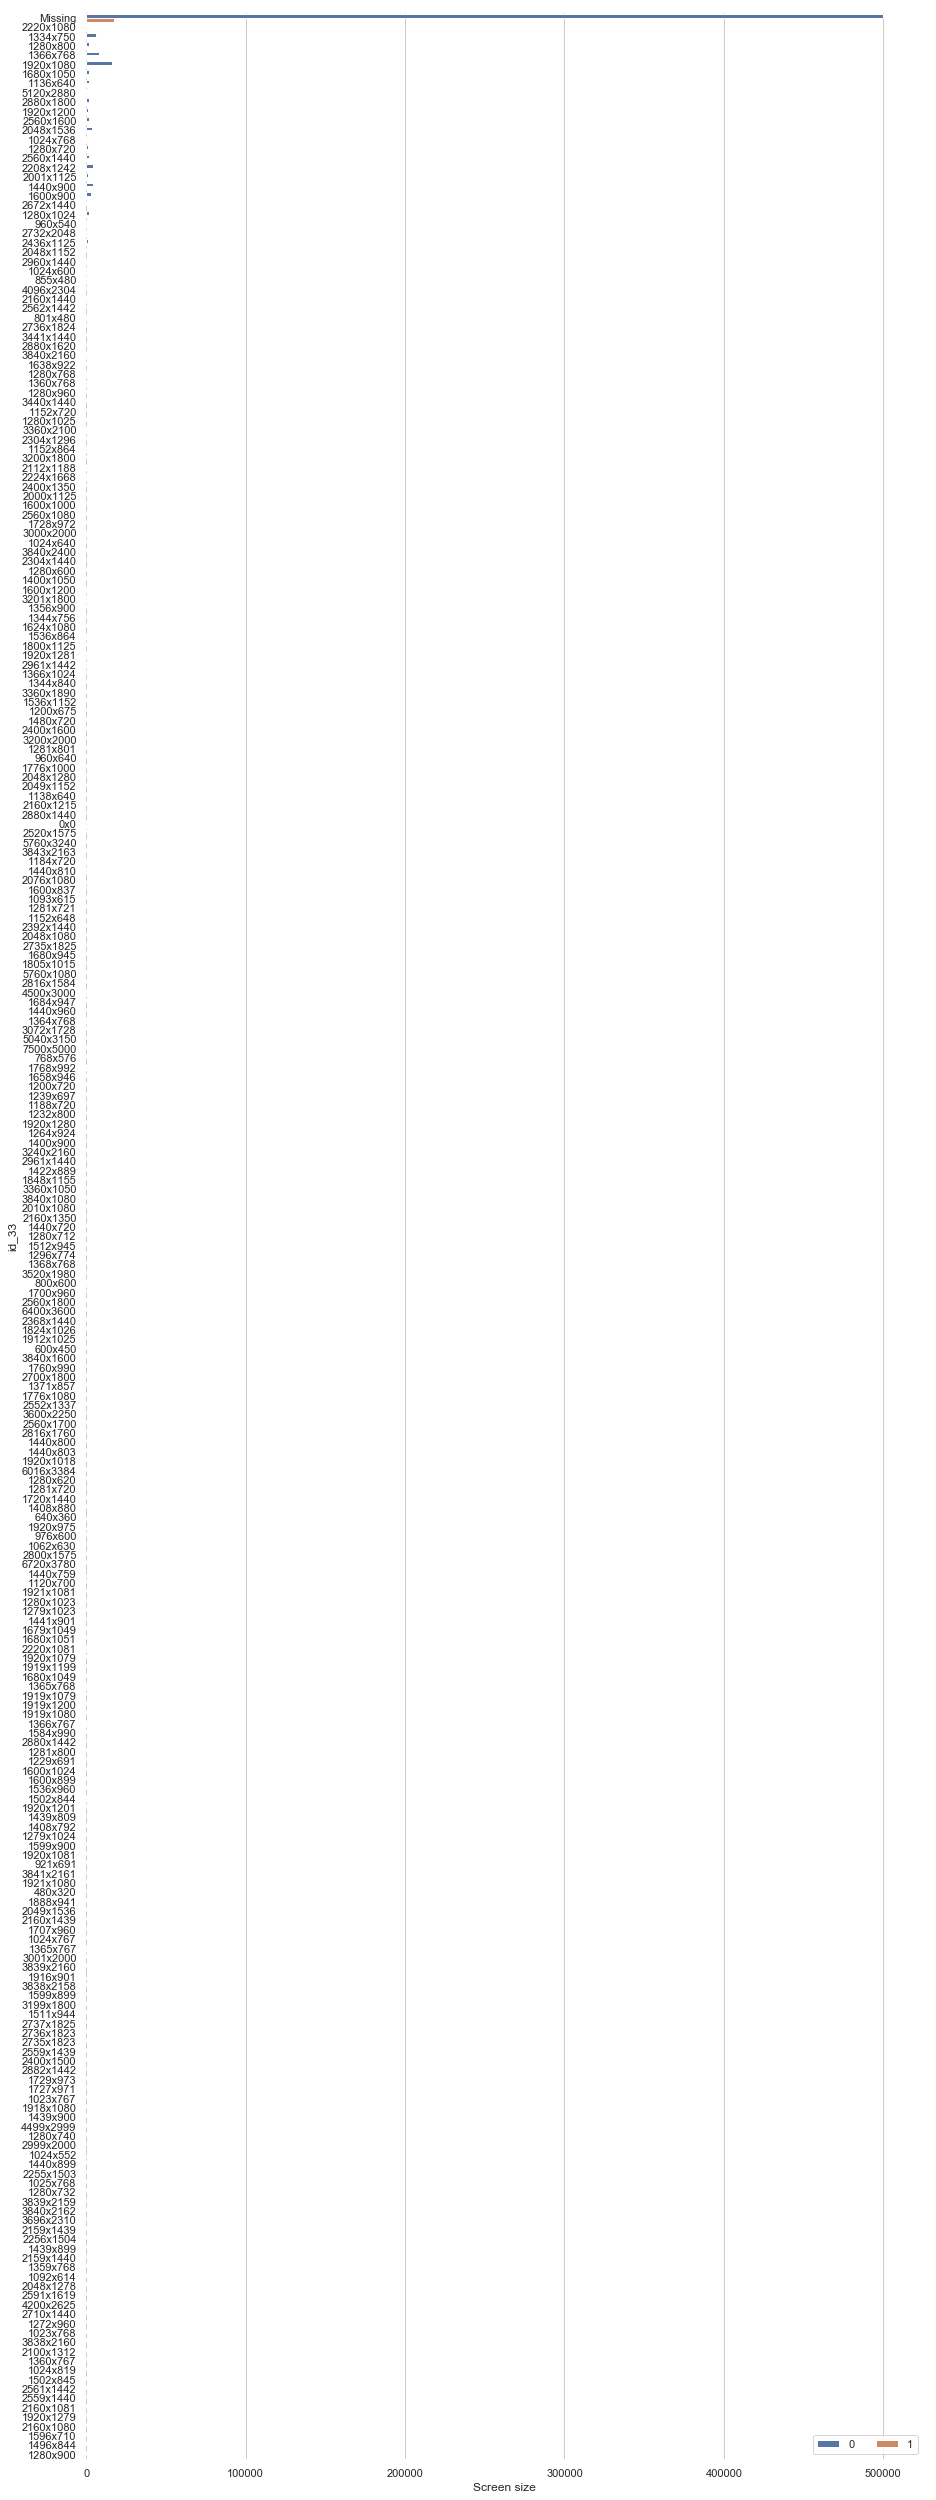

In [89]:
fig = plt.figure(figsize=(15,45))

sns.set(style="whitegrid")

ax = sns.countplot(y='id_33', hue='isFraud', data=target_df)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Screen size", label=True)
sns.despine(left=True, bottom=True)

[Text(0, 0.5, 'Normalized count'),
 Text(0.5, 0, 'isFraud'),
 Text(0.5, 1.0, '1600X900')]

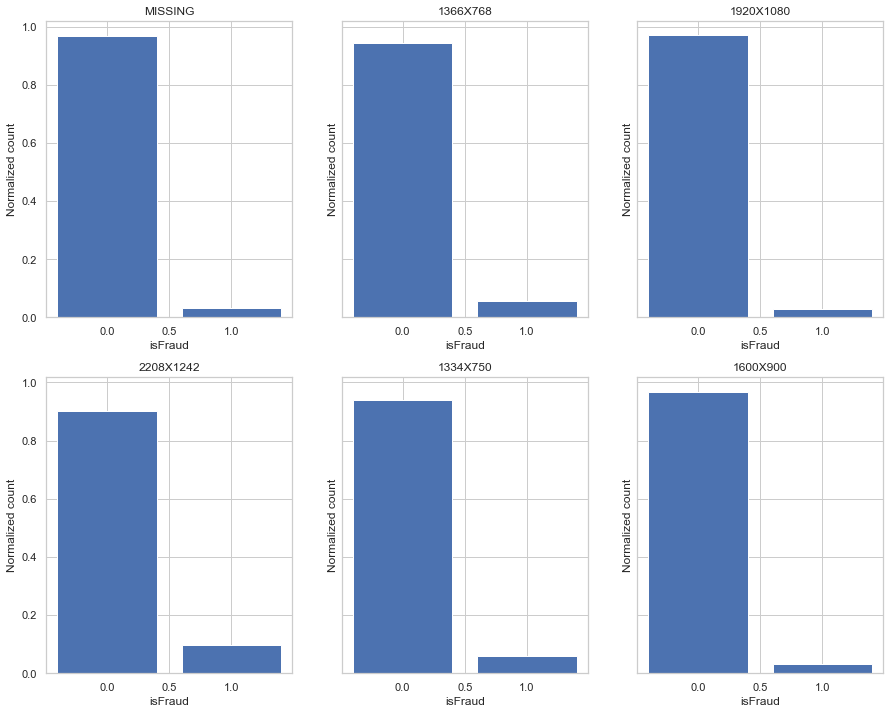

In [90]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (15,12), sharey=True)

# axes = axes.flatten()

axes[0,0].bar(target_df[target_df['id_33'] == 'Missing']['isFraud'].value_counts().index,
            target_df[target_df['id_33'] == 'Missing']['isFraud'].value_counts().values/\
            target_df[target_df['id_33'] == 'Missing']['isFraud'].value_counts().sum())
axes[0,0].set(title='Missing'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

axes[0,1].bar(target_df[target_df['id_33'] == '1366x768']['isFraud'].value_counts().index,
            target_df[target_df['id_33'] == '1366x768']['isFraud'].value_counts().values/\
            target_df[target_df['id_33'] == '1366x768']['isFraud'].value_counts().sum())
axes[0,1].set(title='1366x768'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

axes[0,2].bar(target_df[target_df['id_33'] == '1920x1080']['isFraud'].value_counts().index,
            target_df[target_df['id_33'] == '1920x1080']['isFraud'].value_counts().values/\
            target_df[target_df['id_33'] == '1920x1080']['isFraud'].value_counts().sum())
axes[0,2].set(title='1920x1080'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

axes[1,0].bar(target_df[target_df['id_33'] == '2208x1242']['isFraud'].value_counts().index,
            target_df[target_df['id_33'] == '2208x1242']['isFraud'].value_counts().values/\
            target_df[target_df['id_33'] == '2208x1242']['isFraud'].value_counts().sum())
axes[1,0].set(title='2208x1242'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

axes[1,1].bar(target_df[target_df['id_33'] == '1334x750']['isFraud'].value_counts().index,
            target_df[target_df['id_33'] == '1334x750']['isFraud'].value_counts().values/\
            target_df[target_df['id_33'] == '1334x750']['isFraud'].value_counts().sum())
axes[1,1].set(title='1334x750'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

axes[1,2].bar(target_df[target_df['id_33'] == '1600x900']['isFraud'].value_counts().index,
            target_df[target_df['id_33'] == '1600x900']['isFraud'].value_counts().values/\
            target_df[target_df['id_33'] == '1600x900']['isFraud'].value_counts().sum())
axes[1,2].set(title='1600x900'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

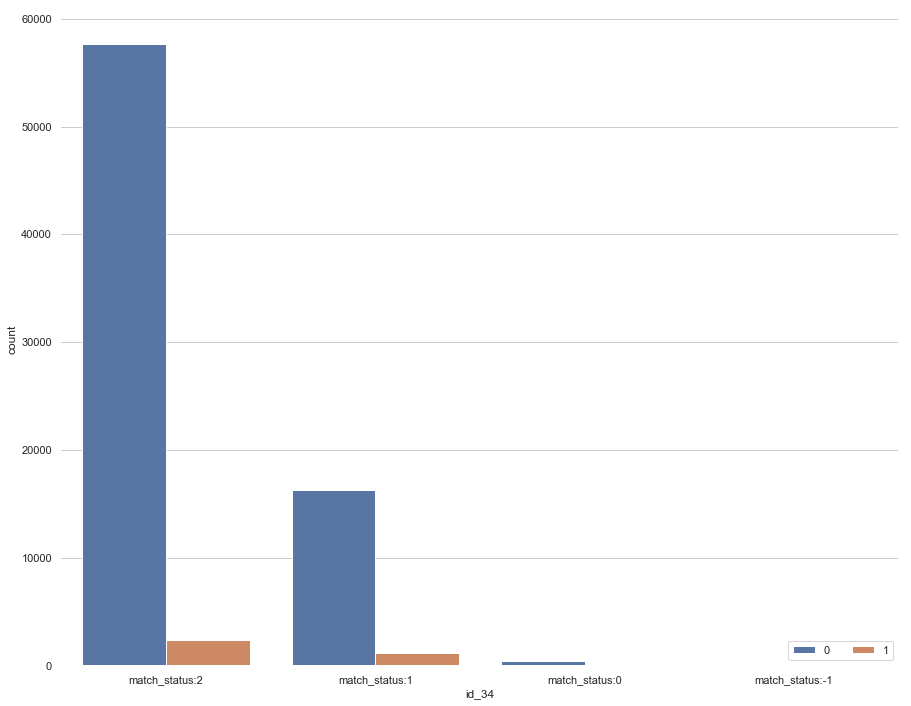

In [91]:
fig = plt.figure(figsize=(15,12))

sns.set(style="whitegrid")

ax = sns.countplot(x='id_34', hue='isFraud', data=target_df)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="id_34", label=True)
sns.despine(left=True, bottom=True)

In [92]:
target_df['id_34'].fillna('Missing', inplace=True)

[Text(0, 0.5, 'Normalized count'),
 Text(0.5, 0, 'isFraud'),
 Text(0.5, 1.0, 'MATCH_STATUS:2')]

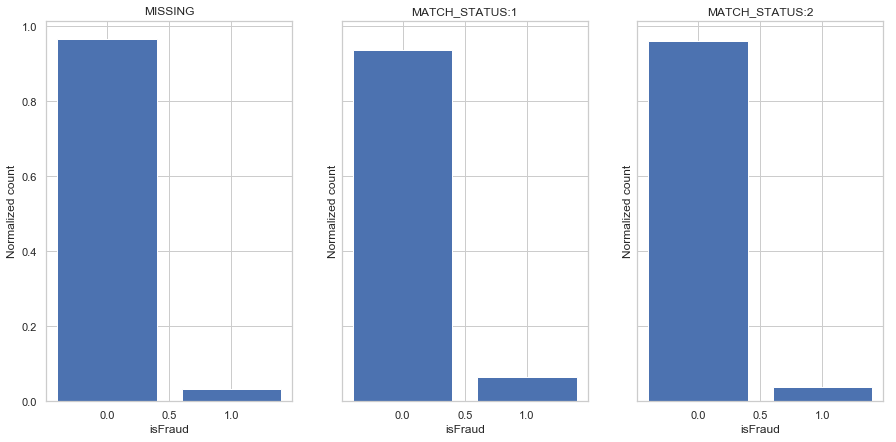

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,7), sharey=True)

axes = axes.flatten()

axes[0].bar(target_df[target_df['id_34'] == 'Missing']['isFraud'].value_counts().index,
            target_df[target_df['id_34'] == 'Missing']['isFraud'].value_counts().values/\
            target_df[target_df['id_34'] == 'Missing']['isFraud'].value_counts().sum())
axes[0].set(title='Missing'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

axes[1].bar(target_df[target_df['id_34'] == 'match_status:1']['isFraud'].value_counts().index,
            target_df[target_df['id_34'] == 'match_status:1']['isFraud'].value_counts().values/\
            target_df[target_df['id_34'] == 'match_status:1']['isFraud'].value_counts().sum())
axes[1].set(title='match_status:1'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

axes[2].bar(target_df[target_df['id_34'] == 'match_status:2']['isFraud'].value_counts().index,
            target_df[target_df['id_34'] == 'match_status:2']['isFraud'].value_counts().values/\
            target_df[target_df['id_34'] == 'match_status:2']['isFraud'].value_counts().sum())
axes[2].set(title='match_status:2'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

Association between match_status:1 and target

In [95]:
target_df.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Missing,NaN,NaN,NaN,NaN,Missing,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,m

V138 onwards transaction features seem to only apply to those transactions with ids associated with them